### Unsupervised Machine Learning
Assignment #2 <br>
Applying PCA and LDA <br>
Michael Zwartz<br>

#### Feature Extraction Techniques
Principal component analysis and linear discriminant analysis are methods of feature extration. These methods are used on high dimensional data to help visulaize or run machine learning algorithms more efficiently. In data science there's a common phrase when using data with many features: the curse of dimensionality. This phrase refers to the fact that data with more features becomes more difficult to analyze. This is becuase the data is either more difficult to visulaize or becasue an algorithm has more computation to power through with each added feature. PCA and LDA are common methods for dealing with the curse of dimensionality. These techniques are built to transform data from many dimensions down to as few as a single dimension. Both PCA and LDA retain the information from all the features that they reduce down. The main difference is that LDA maintains the class structure while PCA does not. PCA generally works better for simpiler datasets while LDA is most commonly used on more complex datasets. 

#### The Data

The data used in this report is baseball statistics that were downloaded using the pybaseball package. This package is used to webscrape from Baseball Reference, Baseball Savant, and FanGraphs. The dataset contians batting infomation for every MLB player in the last 20 years. The data set was cleaned to contain only complete columns. Next, the top 20 features were selected using Sequential Feature Selection relating to the player's WAR. The data in those 20 columns was normalized. Below, PCA and LDA are used on that dataset to futher reduce the number of features for better visualization. 

#### Algorithm Design
**PCA**
Principal component alaysis is the simpliler of the two techniques. The basics idea is that each instance is multiplied by the eigenvector associated with the highest eigenvalue calculated from the covariance matrix of features. PCA is completed with the following steps <br>
1. Upload and clean dataset
2. Calculate the covariance matrix
3. Find the Eigenvectors and Eigenvalues
4. Sort the Eigenvalues from highest to lowest
5. Choose the number of features in the output
6. Multiply the dataset by the eigenvectors associated with the largest eigenvalues

**LDA**
Linear discriminant analysis is a more complex process becuase its purpose is to maintain the class structure. To do this, LDA will calculate the mean for each class. One task of LDA is to maximize the distance between sample means.LDA is completed in the following steps: 
1. Upload and clean dataset
2. Find the mean values for each class and for the dataset as a whole
3. Caculate the covariance for each class
4. Find the sum of the covariance mitricies 
5. Square the difference of the class means
6. Take the inverse of the summed covariance matrix
7. Calculate the eigenvectors and eigenvalues of the summed covariance matrix
8. Multiply each class by the eigenvector associated with the first eigenvalue

### Code and Results
*Analysis to follow*

In [49]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset
data = pd.read_csv("batStats_clean20.csv")

id_columns = ['IDfg', 'Season', 'Name', 'Team']
data_columns = ['Age','IBB','SO','SB','BU','BABIP','IFH%','WAR','Spd','PH','CB%',
    'O-Contact%','wGDP','Oppo%','OBP+','SLG+','Pull%+','Soft%+','Hard%+','L-WAR']



In [50]:
#remove the Type classification feature from the data set for PCA analysis
PCA_batStats = data[data_columns]

#calculate the eigenvalues and eigenvectors
eigen_val, eigen_vec = np.linalg.eig(PCA_batStats.cov())

#sort the eigenvalues from highest to lowest
sorted_index = np.argsort(eigen_val)[::-1]
sorted_eigenvalue = eigen_val[sorted_index]

#sort the eigenvectors to match values
sorted_eigenvec = eigen_vec[:,sorted_index]



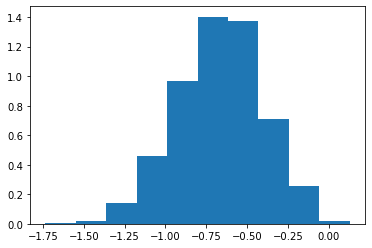

In [51]:
#select eigenvector to reduce the data set to 1D
w1 = sorted_eigenvec[:, 0:1]

#dot productor of eigenvector and dataset
batStats1D_PCA = np.dot(w1.transpose(), PCA_batStats.transpose()).transpose()

#create plot
plot1 = plt.hist(batStats1D_PCA, density=True)

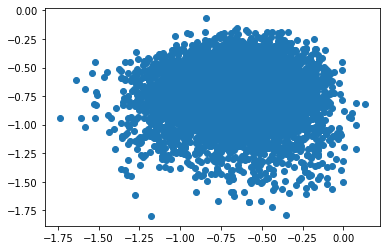

In [52]:
#select eigenvector to reduce the data set to 2D
w2 = sorted_eigenvec[:, 0:2]

#dot productor of eigenvector and dataset
batStats2D_PCA = np.dot(w2.transpose(), PCA_batStats.transpose()).transpose()

#create plot
plot2 = plt.scatter(batStats2D_PCA[:,0], batStats2D_PCA[:,1])

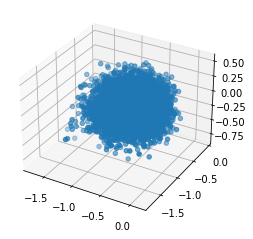

In [54]:
#select eigenvector to reduce the data set to 3D
w3 = sorted_eigenvec[:, 0:3]

#dot productor of eigenvector and dataset
batStats3D_PCA = np.dot(w3.transpose(), PCA_batStats.transpose()).transpose()

#create plot
plot3 = plt.figure()
ax = plot3.add_subplot(projection='3d')
ax.scatter(batStats3D_PCA[:,0], batStats3D_PCA[:,1], batStats3D_PCA[:,2])
plt.show()

In [55]:
#LDA - 1D
LDA_batStats = data[['SO','BABIP', 'OBP+','WAR']]

#define features 
X1 = data['SO']
X2 = data['BABIP']
X3 = data['OBP+']

target = data['WAR']


In [56]:
LDA_batStats['WAR'].describe()

count    5575.000000
mean        0.334737
std         0.120243
min         0.000000
25%         0.248447
50%         0.316770
75%         0.403727
max         1.000000
Name: WAR, dtype: float64

In [57]:
#create 3 classes based on WAR. Bottom 25%, Middle 50%, Top 25%. 
bottom25 = LDA_batStats.loc[LDA_batStats["WAR"] < 0.248447]
middle50 = LDA_batStats.loc[(LDA_batStats["WAR"] > 0.248447) 
                            & (LDA_batStats["WAR"]<0.403727)]
top25 = LDA_batStats.loc[LDA_batStats["WAR"] > 0.403727]

#pull sample of 1000 players from each group
bottom_tier = bottom25.sample(n=1000)
mid_tier = middle50.sample(n=1000)
top_tier = top25.sample(n=1000)


In [58]:
#find class averages
mu1 = np.average(bottom_tier)
mu2 = np.average(mid_tier)
mu3 = np.average(top_tier)

mu = np.average(LDA_batStats)

#calcualte covariance matrix
S1 = np.cov(bottom_tier)
S2 = np.cov(mid_tier)
S3 = np.cov(top_tier)

In [59]:
#sum covariance matricies
Sw = S1 + S2 + S3

#square the sum 
Sb = (mu1-mu2-mu3)*(mu1-mu2-mu3)

#take the inverse 
invSw = np.linalg.inv(Sw)
invSw2 = invSw * Sb 

#calculate eigenvalues
v, d = np.linalg.eig(invSw2)
w = v[:1]
#multiply featurs by eigenvectors 
y1 = X1*w
y2 = X2*w
y3 = X3*w



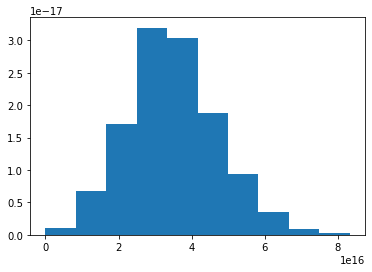

In [60]:
#ignore copy warning 
import warnings
warnings.filterwarnings('ignore')

batStats1D_LDA = pd.concat([y1, y2, y3], axis=0)

plot1 = plt.hist(batStats1D_LDA, density=True)

### Analysis

##### PCA
Principal component analysis was used to break down the 20 features in the dataset. The first plot above shows the 1 dimentional feature extraction. This plot shows a bell curve shape, which is about what I expected. Most hitters fall into the middle and would be classified as average. There are less hitters that are above or below average and that shows on this 1D histogram. 

The next PCA plot shows this data as two dimentsions. Again, we can see most datapoints fall in the middle but skewed slightly to the right. There are outliers starting to appear in the data. This rightward skew, along with there being more outliers to the left of the data is significant. I think this shows that there are more hitters above average than below. I think the median of this data would skew to the right. The outliers to the left of the average might be considered defensive specialists and that is valuable to a team. 

The third PCA plot continues to show most of the hitters falling in the middle. The 3D plot does not seem to show a significant skew. The outliers are still present in this data set. 

##### LDA 
The first step in using LDA for feature extraction was to define the clusters in the data. To simplfy this process I only accounted for 4 feaures instead of the 20 feautres used with the PCA extraction. The 4 feaures selected to use with LDA were 'SO', 'BABIP', and 'OBP+', and 'WAR'. These were the most significat features according to the sequential feature selection performed when cleaning this dataset. From there, I divided the hitters into three groups based on thier WAR statistic (wins above replacement). WAR is a popular baseball counting statistic generally used to meausre how good a player is over the period of time. I called the three groups top tier, middle tier, and bottom tier players. The top tier group consisted of hitters with a WAR in the top 25% of the dataset, the bottom tier has players in the bottom 25%, and the middle tier is the middle 50%. I took a sample of 1000 players from each group so the data for each group would be the same shape.

With the groups defined, LDA was performed to extract 1 feature that maintained the structure of these groups. This single feature was plotted on a histogram to make the last figure in this report. This figure is similar to the 1D PCA figure. It shows most hitters falling into the middle of th plot. The LDA plot does look skewed slightly left, compared to the shift seen in the PCA 1D plot. I am suprised the data is still bell-curve shaped becuase the LDA process took samples from each group of players. I anticipated the plot to look flatter and more spread out with a more even distribution from top tier, middle tier, and bottom tier players. 

##### Next steps 
This data might be able to group the hitters into categories like power hitter, contact hitter, etc. This data might be able to predict who will have a good year in the next season. 